# 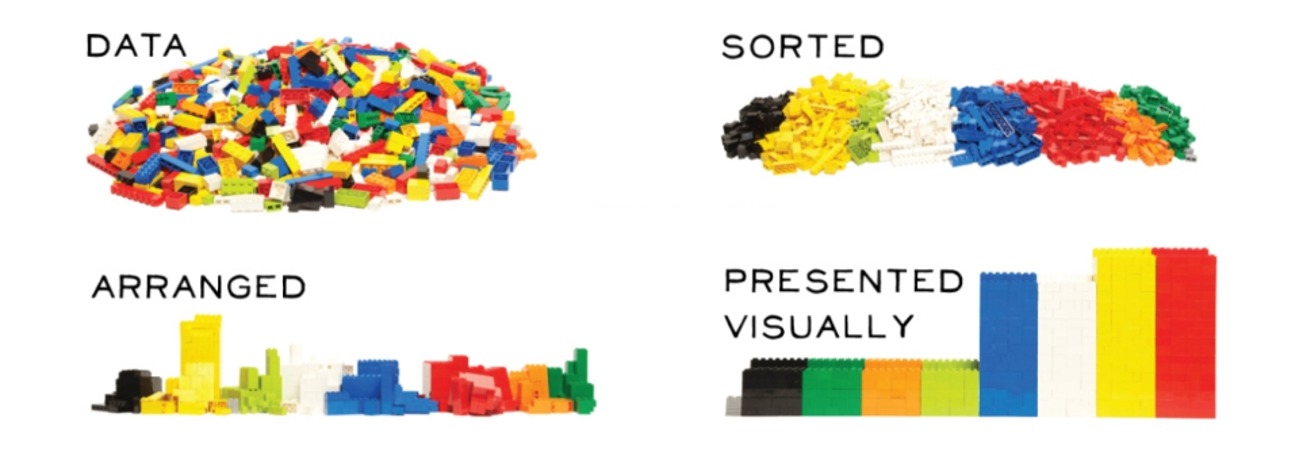
Source: https://medium.com/code-heroku/introduction-to-exploratory-data-analysis-eda-c0257f888676 

### Methods in this article:
- [Descriptive Statistics](#descriptivestatistics)
- [Grouping of Data](#groupingofdata)
- [Handling missing values in dataset](#handlingmissingvalues)
- [ANOVA: Analysis of variance](#anova)
- [Correlation](#correlation)

<a name="Descriptive statistics"></a>

##### Descriptive statistics <a class="anchor" id="descriptivestatistics"></a>

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
df = pd.read_csv('automobile.csv') #read data from CSV file

In [2]:
# Check if the data is successfully imported
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [4]:
# Get some statistical characteristics of the dataset. For numerical data we use `describe()`
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [5]:
# For categrical data we can use method `count()`
df['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

Use of _Box Plot_ to analyse numerical data.
Box plot shows us the __median__ of the data, which represents where the middle data point is. The upper and lower quartiles represent the __75__ and __25 percentile__ of the data respectively. The upper and lower extremes shows us the __extreme ends__ of the distribution of our data. Finally, it also represents __outliers__, which occur outside the upper and lower extremes.
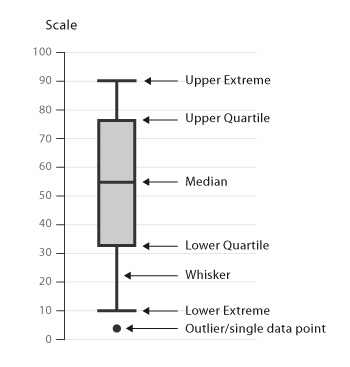

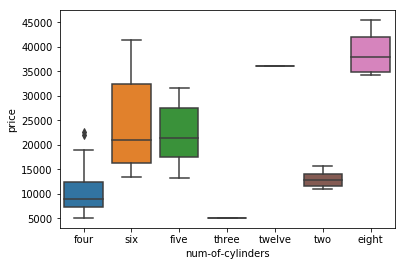

In [7]:
# Distribution of prices of cars based on the different cylinders
sns.boxplot(x='num-of-cylinders', y='price', data=df)

Use __Scatter Plot__ to understand the relationships between continious variables. Method `scatter()` represents each relationship between two continuous variables as individual data point in a 2D graph

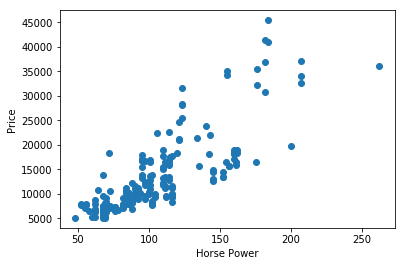

In [8]:
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horse Power')
plt.ylabel('Price')
plt.show()

__Histogram__ shows frequency distribution of a variable. It partitions the spread of numeric data into parts called as __“bins”__ and then counts the number of data points that fall into each bin. So, the vertical axis actually represents the number of data points in each bin 

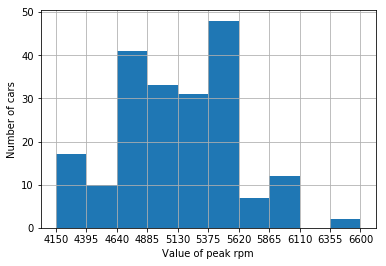

In [9]:
count, bin_edges = np.histogram(df['peak-rpm'])
df['peak-rpm'].plot(kind='hist', xticks=bin_edges)
plt.xlabel('Value of peak rpm')
plt.ylabel('Number of cars')
plt.grid()
plt.show()

##### Grouping of Data <a class="anchor" id="groupingofdata"></a>
Assume that you want to know the average price of different types of vehicles and observe how they differ according to body styles and number of doors. we can use The `groupby()` method from Pandas library helps us to accomplish this task.

In [11]:
df_temp = df[['num-of-doors', 'body-style', 'price']]
df_group = df_temp.groupby(['num-of-doors', 'body-style'], as_index=False).mean()

In [12]:
df_group

,num-of-doors,body-style,price
0,four,hatchback,8372.000000
1,four,sedan,14490.687500
2,four,wagon,12371.960000
3,two,convertible,21890.500000
4,two,hardtop,22208.500000
5,two,hatchback,10230.793103
6,two,sedan,14283.000000


For more convenient reading we can convert this table to a pivot table using the `pivot()` method

In [14]:
df_pivot = df_group.pivot(index='body-style',columns='num-of-doors')
df_pivot

price              
num-of-doors        four           two
body-style                            
convertible          NaN  21890.500000
hardtop              NaN  22208.500000
hatchback      8372.0000  10230.793103
sedan         14490.6875  14283.000000
wagon         12371.9600           NaN

##### Handling missing values <a class="anchor" id="handlingmissingvalues"></a>
We can detect missing values by applying `isnull()` method over the dataframe. The `isnull()` method returns a rectangular grid of boolean values which tells us if a particular cell in the dataframe has missing value or not.

In [22]:
df.isnull()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


##### Heatmap
Heatmap takes a rectangular data grid as input and then assigns a color intensity to each data cell based on the data value of the cell. This is a great way to get visual clues about the data.

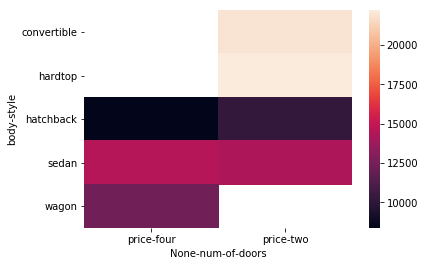

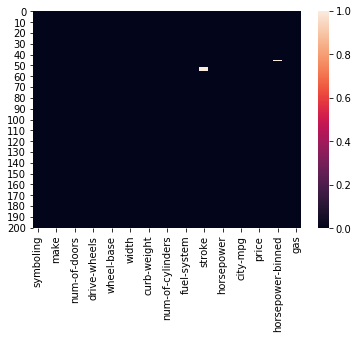

In [29]:
sns.heatmap(df_pivot)
plt.show()
sns.heatmap(df.isnull())
plt.show()

##### How to handle missing values:
- _Delete_: You can delete the rows with the missing values or delete the whole column which has missing values. The `dropna()` method from Pandas library can be used to accomplish this task.


- _Impute_: Deleting data might cause huge amount of information loss. So, replacing data might be a better option than deleting. One standard replacement technique is to replace missing values with the __average value__ of the entire column. For example, we can replace the missing values in “stroke” column with the __mean__ value of stroke column. The `fillna()` method from Pandas library can be used to accomplish this task.


- _Predictive filling_: Alternatively, you can choose to fill missing values through predictive filling. The `interpolate()` method will perform a __linear interpolation__ in order to “guess” the missing values and fill the results in the dataset.

##### ANOVA (Analysis of Variance) <a class="anchor" id="anova"></a>
__ANOVA__ is a statistical method which is used for figuring out the relation between different groups of __categorical data__. The ANOVA test, gives us two measures as result:


_F-test score_: It calculates the variation between __sample group means__ divided by variation within sample group.


_P value_: It shows us the __confidence degree__. In other words, it tells us whether the obtained result is __statistically significant__ or not.


The ANOVA test can be performed using the `f_oneway()` method from Scipy library

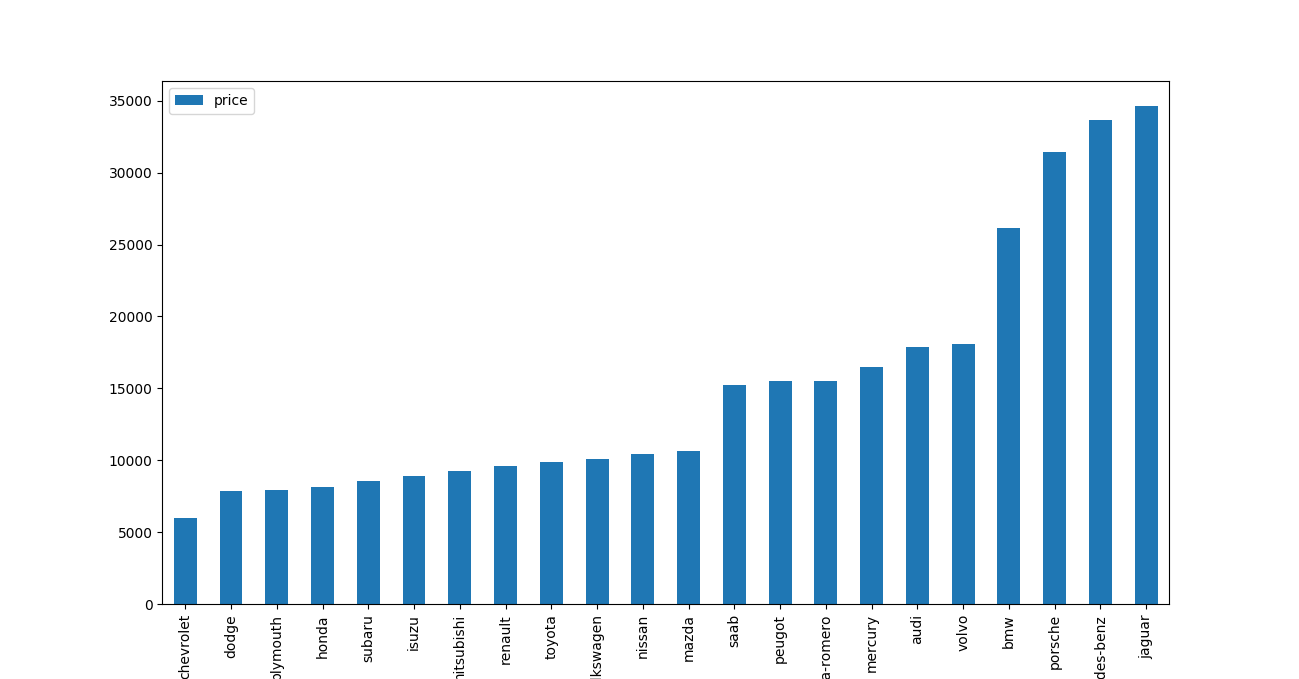

We can see that the average price of “audi” and “volvo” is almost same. But, the average price of “jaguar” and “honda” differ significantly. So, we can say that there is very __small variance__ between “audi” and “volvo” because their average price is almost same. While the variance between “jaguar” and “honda” is __significantly high__. 

In [31]:
anova_df = df[['make','price']].groupby(['make'])
stats.f_oneway(anova_df.get_group('audi')['price'], anova_df.get_group('volvo')['price'])

F_onewayResult(statistic=0.014303241552631388, pvalue=0.9063901597143602)

Since the variance between the price of “audi” and “volvo” is very small, we got a __F-test__ score which is very small (around 0.01) and a __p-value__ around 0.9

In [32]:
stats.f_oneway(anova_df.get_group('jaguar')['price'], anova_df.get_group('honda')['price'])

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

In this case, we got a very high __F-Test__ score(around 401) with a __p-value__ around 1.05 * 10^-11 because, the variance between the average price of “jaguar” and “honda” is huge.

##### Correlation <a class="anchor" id="correlation"></a>

Correlation is a statistical metric for measuring to what extent different variables are __interdependent__. When we look at two variables over time, if one variable changes, how does this effect change in the other variable?

We can see the correlation between different variables using the `corr()` function. Then we can plot a __heatmap__ over this output to visualize the results.

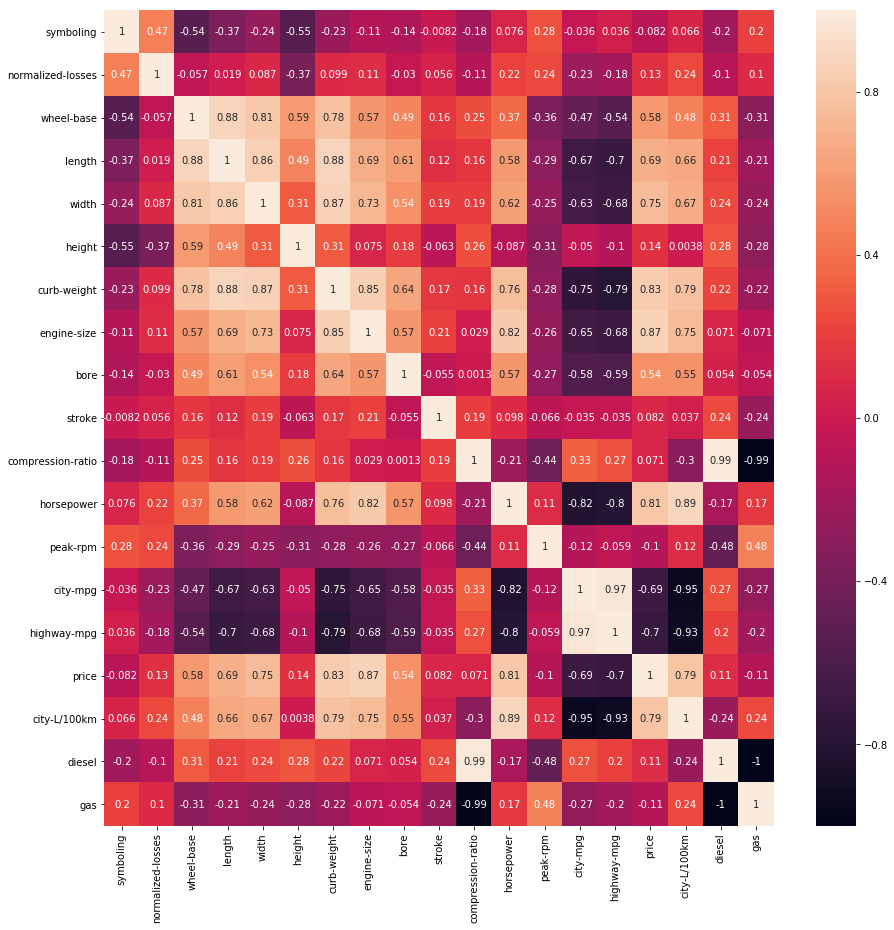

In [39]:
plt.subplots(figsize=(15,15))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

From the above heatmap:
- engine size and price are __positively correlated(score of 0.87)__ with each other. In other words, it tells us that cars with larger engine sizes will be costlier than cars with small engine sizes
- highway-mpg and price are __negatively correlated(score of -0.7)__ with each other. It tells us that expensive cars generally have less MPG as compared to cheaper cars

We can verify this relationship by plotting regression plots between these variables:

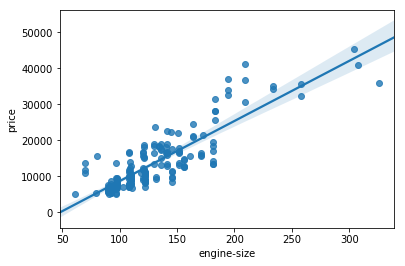

In [43]:
sns.regplot(x='engine-size', y='price', data=df)

It shows positive correlation between the price and the engine-size

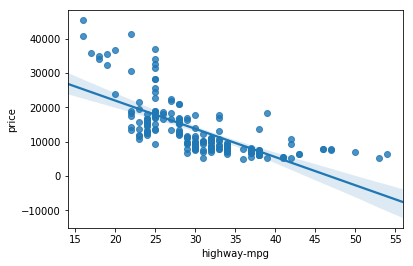

In [44]:
sns.regplot(x='highway-mpg',y='price',data=df)

It shows negative correlation between the price and the highway-mpg